In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder

In [3]:
from sklearn.metrics import classification_report as report
from sklearn.metrics import accuracy_score as acc
from sklearn.metrics import confusion_matrix as conf

In [4]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import load_model
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping

In [5]:
df = pd.read_csv("customers.csv")
df.columns
df.dtypes
df.shape
df.isnull().sum()


ID                    0
Gender                0
Ever_Married        190
Age                   0
Graduated           102
Profession          162
Work_Experience    1098
Spending_Score        0
Family_Size         448
Var_1               108
Segmentation          0
dtype: int64

In [6]:
df = df.drop('ID',axis=1)
df = df.drop('Var_1',axis=1)

In [7]:
df_cleaned = df.dropna(axis=0)

In [8]:
df_cleaned.isnull().sum()
df_cleaned.shape
df_cleaned.dtypes


Gender              object
Ever_Married        object
Age                  int64
Graduated           object
Profession          object
Work_Experience    float64
Spending_Score      object
Family_Size        float64
Segmentation        object
dtype: object

In [9]:
df_cleaned['Gender'].unique()
df_cleaned['Ever_Married'].unique()
df_cleaned['Graduated'].unique()
df_cleaned['Profession'].unique()
df_cleaned['Spending_Score'].unique()
df_cleaned['Segmentation'].unique()

array(['D', 'B', 'C', 'A'], dtype=object)

In [10]:
categories_list=[['Male', 'Female'],['No', 'Yes'],
                 ['No', 'Yes'],['Healthcare', 'Engineer',
                 'Lawyer','Artist', 'Doctor','Homemaker',
                 'Entertainment', 'Marketing', 'Executive'],
                 ['Low', 'Average', 'High']]

In [11]:
enc = OrdinalEncoder(categories=categories_list)

In [12]:
df1 = df_cleaned.copy()

In [13]:
df1[['Gender','Ever_Married',
     'Graduated','Profession',
     'Spending_Score']] = enc.fit_transform(df1[['Gender',
     						'Ever_Married','Graduated',
                            'Profession','Spending_Score']])

In [16]:
df1


,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Segmentation
0,0.0,0.0,22,0.0,0.0,1.0,0.0,4.0,D
2,1.0,1.0,67,1.0,1.0,1.0,0.0,1.0,B
3,0.0,1.0,67,1.0,2.0,0.0,2.0,2.0,B
5,0.0,1.0,56,0.0,3.0,0.0,1.0,2.0,C
6,0.0,0.0,32,1.0,0.0,1.0,0.0,3.0,C
...,...,...,...,...,...,...,...,...,...
10689,1.0,0.0,35,1.0,6.0,1.0,0.0,2.0,D
10690,0.0,0.0,29,0.0,0.0,9.0,0.0,4.0,B
10691,1.0,0.0,35,1.0,4.0,1.0,0.0,1.0,A
10693,0.0,1.0,47,1.0,8.0,1.0,2.0,5.0,C


In [17]:
df1.dtypes

Gender             float64
Ever_Married       float64
Age                  int64
Graduated          float64
Profession         float64
Work_Experience    float64
Spending_Score     float64
Family_Size        float64
Segmentation        object
dtype: object

In [52]:
le = LabelEncoder()
df1['Segmentation'] = le.fit_transform(df1['Segmentation'])

In [53]:
corr = df1.corr()

<Axes: >

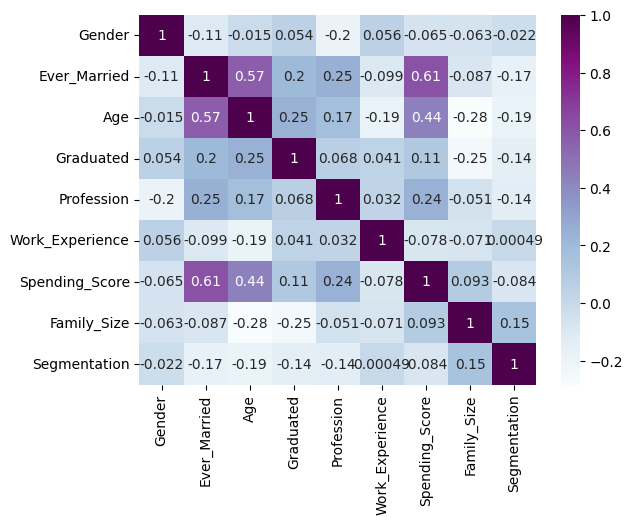

In [54]:
sns.heatmap(corr,
            xticklabels=corr.columns,
            yticklabels=corr.columns,
            cmap="BuPu",
            annot= True)

<ipython-input-55-29dcdd096848>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1['Age'])


<Axes: xlabel='Age', ylabel='Density'>

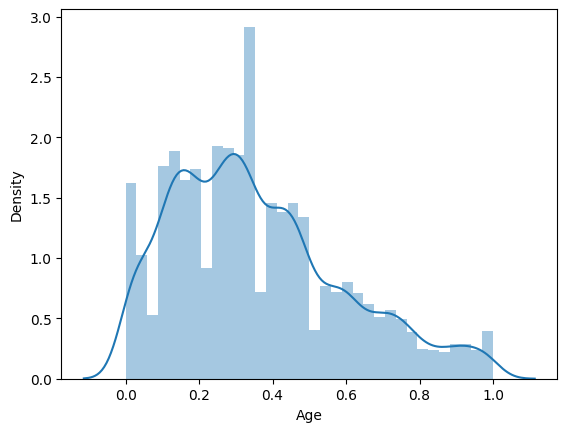

In [55]:

sns.distplot(df1['Age'])

In [21]:
plt.figure(figsize=(10,6))


<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='Family_Size', ylabel='Age'>

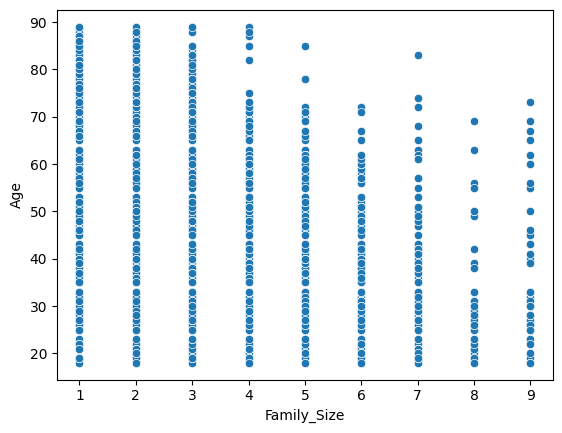

In [22]:
sns.scatterplot(x='Family_Size',y='Age',data=df1)

In [23]:
scale = MinMaxScaler()
scale.fit(df1[["Age"]])

MinMaxScaler()

In [24]:
df1[["Age"]] = scale.transform(df1[["Age"]])

In [25]:
df1.describe()

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size
count,8896.000000,8896.000000,8896.000000,8896.000000,8896.000000,8896.000000,8896.000000,8896.000000
mean,0.449753,0.591389,0.359171,0.633543,3.284735,2.612747,0.545414,2.841165
std,0.497497,0.491605,0.233407,0.481863,2.346963,3.391636,0.738536,1.533532
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.183099,0.000000,2.000000,0.000000,0.000000,2.000000
50%,0.000000,1.000000,0.323944,1.000000,3.000000,1.000000,0.000000,2.000000
75%,1.000000,1.000000,0.492958,1.000000,5.000000,4.000000,1.000000,4.000000
max,1.000000,1.000000,1.000000,1.000000,8.000000,14.000000,2.000000,9.000000


In [26]:
df1['Segmentation'].unique()

array(['D', 'B', 'C', 'A'], dtype=object)

In [27]:
x = df1[['Gender','Ever_Married','Age','Graduated',
		 'Profession','Work_Experience','Spending_Score',
         'Family_Size']].values

In [28]:
y1 = df1[['Segmentation']].values

In [29]:
ohe = OneHotEncoder()
ohe.fit(y1)

OneHotEncoder()

In [30]:
y = ohe.transform(y1).toarray()

In [31]:

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=1/3,random_state=50)


In [32]:
ai = Sequential([Dense(77,input_shape = [8]),
                 Dense(67,activation="relu"),
                 Dense(58,activation="relu"),
                 Dense(37,activation="relu"),
                 Dense(4,activation="softmax")])

In [33]:

ai.compile(optimizer='adam',
           loss='categorical_crossentropy',
           metrics=['accuracy'])

In [34]:

early_stop = EarlyStopping(
    monitor='val_loss',
    mode='max',
    verbose=1,
    patience=20)

In [35]:
ai.fit( x = x_train, y = y_train,
        epochs=500, batch_size=256,
        validation_data=(x_test,y_test),
        callbacks = [early_stop]
        )

Epoch 1/500
24/24 [==============================] - 2s 21ms/step - loss: 1.3536 - accuracy: 0.3422 - val_loss: 1.3021 - val_accuracy: 0.4009
Epoch 2/500
24/24 [==============================] - 0s 8ms/step - loss: 1.2818 - accuracy: 0.4083 - val_loss: 1.2519 - val_accuracy: 0.4177
Epoch 3/500
24/24 [==============================] - 0s 10ms/step - loss: 1.2541 - accuracy: 0.4234 - val_loss: 1.2396 - val_accuracy: 0.4336
Epoch 4/500
24/24 [==============================] - 0s 9ms/step - loss: 1.2454 - accuracy: 0.4373 - val_loss: 1.2359 - val_accuracy: 0.4440
Epoch 5/500
24/24 [==============================] - 0s 9ms/step - loss: 1.2346 - accuracy: 0.4467 - val_loss: 1.2221 - val_accuracy: 0.4511
Epoch 6/500
24/24 [==============================] - 0s 8ms/step - loss: 1.2325 - accuracy: 0.4486 - val_loss: 1.2258 - val_accuracy: 0.4494
Epoch 7/500
24/24 [==============================] - 0s 9ms/step - loss: 1.2240 - accuracy: 0.4484 - val_loss: 1.2235 - val_accuracy: 0.4471
Epoch 8/500

In [36]:
metrics = pd.DataFrame(ai.history.history)
metrics.head()

,loss,accuracy,val_loss,val_accuracy
0,1.353599,0.342159,1.302052,0.400877
1,1.281844,0.408263,1.251910,0.417734
2,1.254128,0.423440,1.239628,0.433581
3,1.245420,0.437268,1.235913,0.444032
4,1.234601,0.446712,1.222090,0.451113


<Axes: >

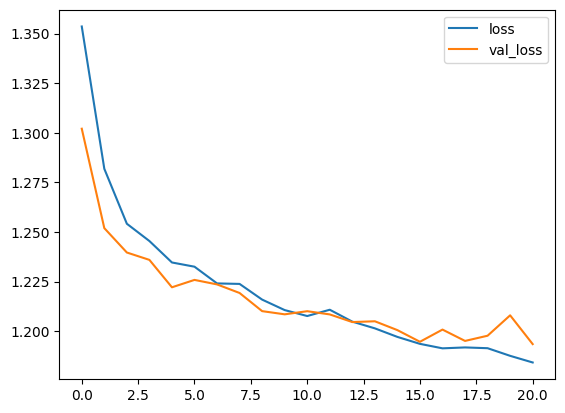

In [37]:

metrics[['loss','val_loss']].plot()

<Axes: >

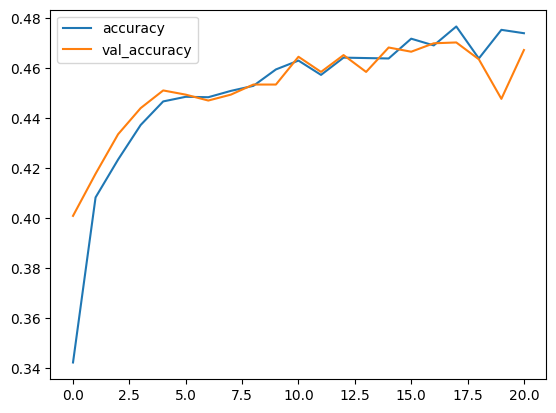

In [38]:
metrics[['accuracy','val_accuracy']].plot()

In [39]:
x_pred = np.argmax(ai.predict(x_test), axis=1)
x_pred.shape

93/93 [==============================] - 0s 1ms/step


(2966,)

In [40]:
y_truevalue = np.argmax(y_test,axis=1)
y_truevalue.shape

(2966,)

In [41]:
conf(y_truevalue,x_pred)

array([[305, 217,  92, 165],
       [184, 236, 166,  83],
       [102, 199, 345,  85],
       [157,  85,  45, 500]])

In [42]:
print(report(y_truevalue,x_pred))

              precision    recall  f1-score   support

           0       0.41      0.39      0.40       779
           1       0.32      0.35      0.34       669
           2       0.53      0.47      0.50       731
           3       0.60      0.64      0.62       787

    accuracy                           0.47      2966
   macro avg       0.47      0.46      0.46      2966
weighted avg       0.47      0.47      0.47      2966



In [43]:
ai.save('customer_classification_model.h5')

In [46]:
ai_brain = load_model('customer_classification_model.h5')

In [48]:
x_prediction = np.argmax(ai_brain.predict(x_test[1:2,:]), axis=1)

1/1 [==============================] - 0s 180ms/step


In [49]:
print(x_prediction)

[1]


In [56]:

print(le.inverse_transform(x_prediction))

['B']
